# Color Manipulation of Images
## 1.1 Using Open CV convert original image to grayscale image

In [83]:
#Mount google drive
import cv2
from google.colab import drive
drive.mount('/content/gdrive/')
from google.colab.patches import cv2_imshow

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


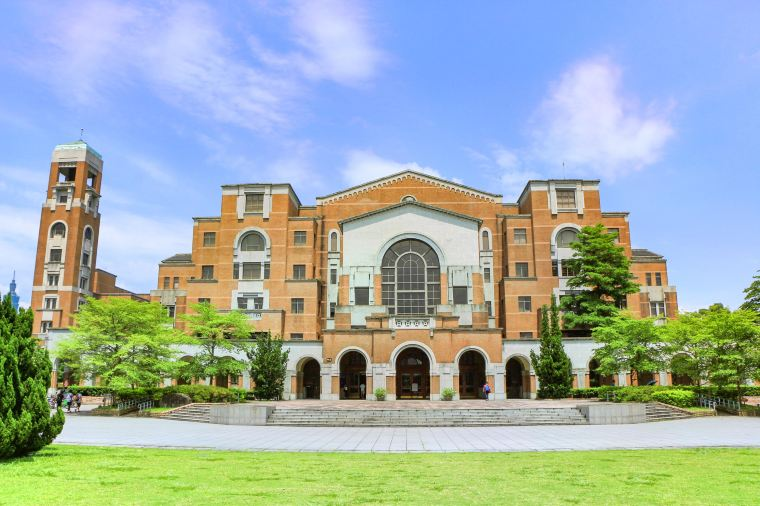

In [88]:
# Reading an image in default mode
path = "./gdrive/MyDrive/Colab Notebooks/0311/Image1.jpg"

originalImage = cv2.imread(path)
cv2_imshow(originalImage)

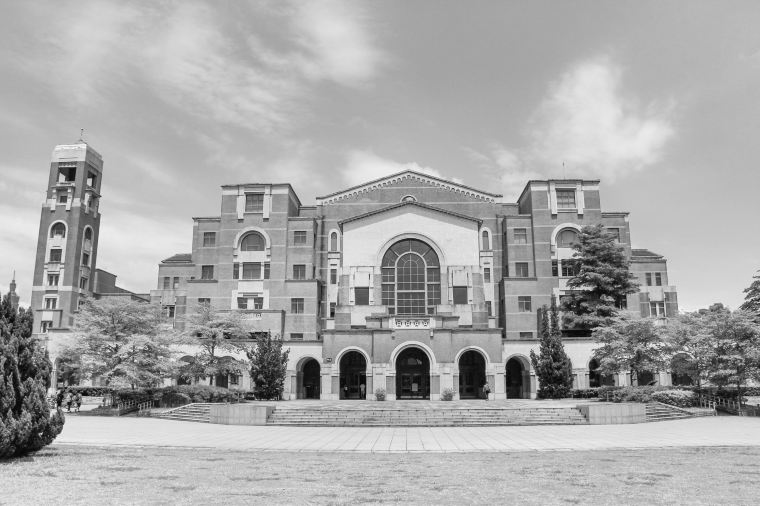

In [ ]:
#the cvtColor function will return the image in gray scale
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY ) 
cv2_imshow(grayImage)

## 1.2 Converting Gary to Black and White Image

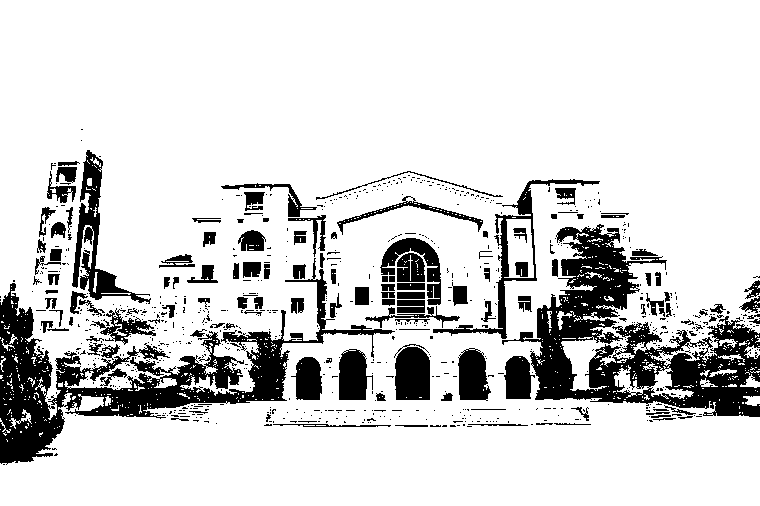

In [ ]:
#the threshold function takes input of grayscale image, the threshold value, max value, and type
#We will consider the value 127, which is in the middle of the scale of the values a pixel 
#in gray scale can take (from 0 to 255)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(blackAndWhiteImage)

## 1.3 Using Pillow Library convert original image to grayscale image

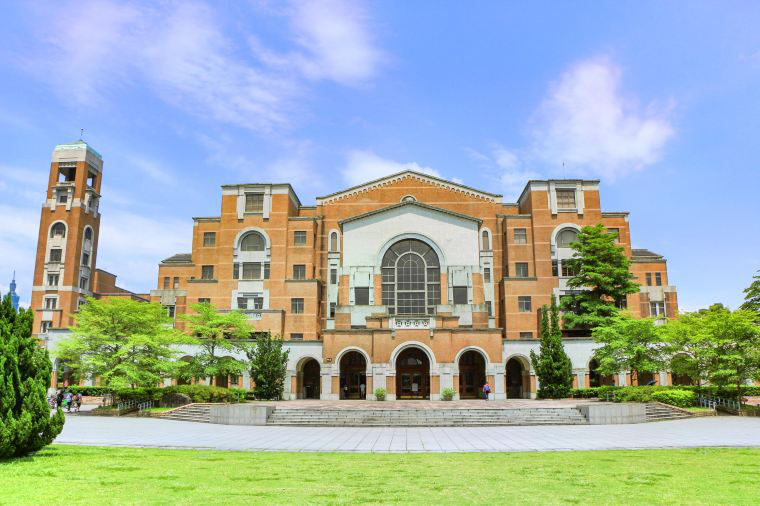

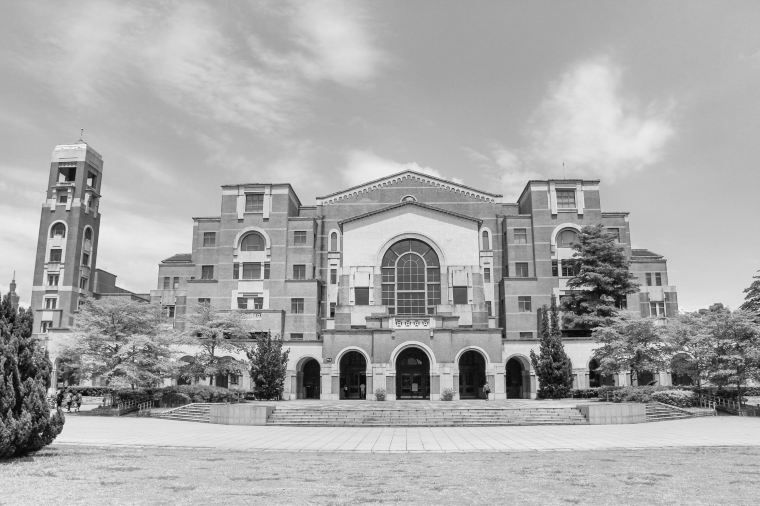

In [ ]:
from PIL import Image
#Open the image using PIL
org_img = Image.open(path)
#Display it
display(org_img)
#Convert the image to grayscale
gray_img = org_img.convert('LA')
#Display the image
display(gray_img)

## 2.1 Lab_task : Use OpenCV for color channel manipulation

Take an Image. Resize it to 50% of it's original size. Convert the Red color channel into 10% of it's original intensity.
New Red channel value = 0.1*original red channel value

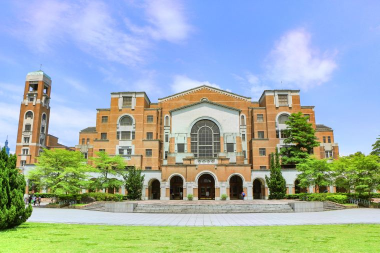

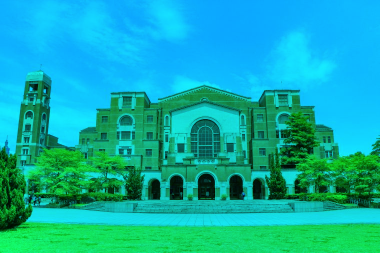

In [ ]:
#Code for resizing the Image
scale_percent = 50 # percent of original size
width = int(originalImage.shape[1] * scale_percent / 100)
height = int(originalImage.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(originalImage, dim, interpolation = cv2.INTER_AREA)

#Show the resized image
cv2_imshow(resized)

#Code for red channel manipulation
m_resized = resized.copy()
m_resized[:,:,2] = m_resized[:,:,2] * 0.1
        
#Show the manipulated images
cv2_imshow(m_resized)

## 2.2 Creating color mask using OpenCV

In this section we will try to color mask the construction safety vests

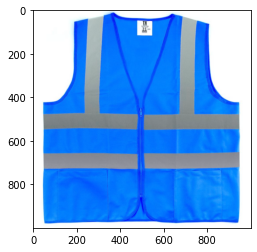

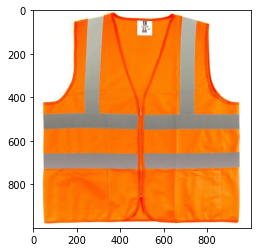

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Open the safety vest image using OpenCV
safetyvest = cv2.imread("./gdrive/MyDrive/Colab Notebooks/0311/safetyvest.jpg")

#Show the image
plt.imshow(safetyvest)
plt.show()

# are the colors correct in this image?
# Open CV represents color channel as BRG instead of RGB

# Convert BGR to RGB
safetyvest = cv2.cvtColor(safetyvest, cv2.COLOR_BGR2RGB) 

# Show the image
plt.imshow(safetyvest)
plt.show()

##Visualizing the image in HSV Color Space

HSV stands for Hue, Saturation, and Value (or brightness), and is a cylindrical color space. The colors, or hues, are modeled as an angular dimension rotating around a central, vertical axis, which represents the value channel. Values go from dark (0 at the bottom) to light at the top. The third axis, saturation, defines the shades of hue from least saturated, at the vertical axis, to most saturated furthest away from the center:

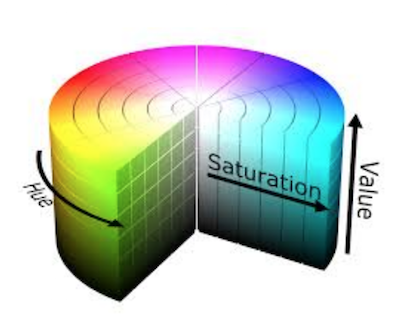

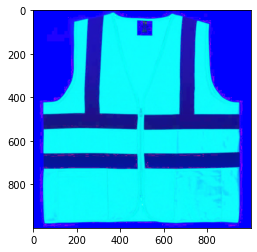

In [ ]:
# Convert the image in HSV space
hsv_sv = cv2.cvtColor(safetyvest, cv2.COLOR_RGB2HSV)

# Show the image
plt.imshow(hsv_sv)
plt.show()

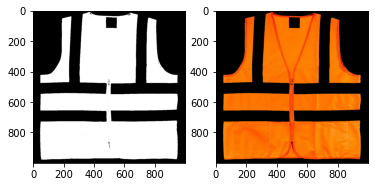

In [ ]:
#You can choose the range by using a color picking app online such as this RGB to HSV tool.
#https://toolstud.io/color/rgb.php

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

#Create a binary mask within the range. If the pixel value is within the range it will return 1 or else 0. You can use cv2.inRange
mask = cv2.inRange(hsv_sv, light_orange, dark_orange)

#To impose the mask on top of the original image, you can use cv2.bitwise_and(), which keeps every pixel in the given image if the corresponding value in the mask is 1:
result = cv2.bitwise_and(safetyvest, safetyvest, mask=mask)

#Use sub blot for showing both the images side by side
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

# 3.1 Bonus

##Collage Maker: Organize your maniplulated images into a photo collage

In this task you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to generate the following output image: Once you are done with the color changes. You should create a photo collage with all the manipulated images.


From the output image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: You shoud resize the image to the 50% of its original size.
Also you should resize the collage by 50%



In [ ]:
#Code for creating 9 manipulated images
def convert_color(resizedImg, blankCollage):

  w = int(resizedImg.shape[1])
  h = int(resizedImg.shape[0])
  
  for color in ["r", "g", "b"]:
    for intensity in [0.1, 0.5, 0.9]:
      m_resized = resizedImg.copy()
      
      if color == "r":
        m_resized[:,:,2] = m_resized[:,:,2] * intensity
        if intensity == 0.1:
          blankCollage[:h, :w, :] = m_resized[:,:,:]
        elif intensity == 0.5:
          blankCollage[:h, w:w*2, :] = m_resized[:,:,:]
        else:
          blankCollage[:h, w*2:w*3, :] = m_resized[:,:,:]

      elif color == "g":
        m_resized[:,:,1] = m_resized[:,:,1] * intensity
        if intensity == 0.1:
          blankCollage[h:h*2, :w, :] = m_resized[:,:,:]
        elif intensity == 0.5:
          blankCollage[h:h*2, w:w*2, :] = m_resized[:,:,:]
        else:
          blankCollage[h:h*2, w*2:w*3, :] = m_resized[:,:,:]      

      else:
        m_resized[:,:,0] = m_resized[:,:,0] * intensity
        if intensity == 0.1:
          blankCollage[h*2:h*3, :w, :] = m_resized[:,:,:]
        elif intensity == 0.5:
          blankCollage[h*2:h*3, w:w*2, :] = m_resized[:,:,:]
        else:
          blankCollage[h*2:h*3, w*2:w*3, :] = m_resized[:,:,:]      

  return blankCollage


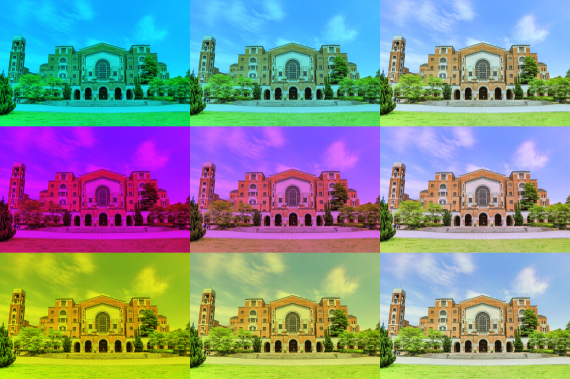

In [ ]:
#Code for creating the photo collage
path = "./gdrive/MyDrive/Colab Notebooks/0311/Image1.jpg"
originalImage = cv2.imread(path)

#resizing the originalImage
w, h = int(originalImage.shape[1] * 0.5), int(originalImage.shape[0] * 0.5)
resized = cv2.resize(originalImage, (w, h), interpolation = cv2.INTER_AREA)

#create a new canvas with size = (resized.shape[0]*3, resized.shape[1]*3, 3)
blank_collage = np.zeros((resized.shape[0]*3, resized.shape[1]*3, 3), np.uint8)

#create converted photo collage and resize it by 50%
collage = convert_color(resized, blank_collage)
cw, ch = int(collage.shape[1] * 0.5), int(collage.shape[0] * 0.5)
resized_collage = cv2.resize(collage, (cw, ch), interpolation = cv2.INTER_AREA)
cv2_imshow(resized_collage)